In [ ]:
import plotnine
from plotnine import ggplot, aes
import pandas as pd

# data sources
from plotnine.data import mtcars
from vega_datasets import data as vds

In [ ]:
!pip install pydataset

In [ ]:
from pydataset import data as pyds

In [8]:
stocks = vds.stocks()
stocks.head()

,symbol,date,price
0,MSFT,2000-01-01,39.81
1,MSFT,2000-02-01,36.35
2,MSFT,2000-03-01,43.22
3,MSFT,2000-04-01,28.37
4,MSFT,2000-05-01,25.45


In [ ]:
stocks.symbol.unique()

# Creamos 5 datasets para independizar las variables de "symbol"

In [ ]:
# data

stocks_MSFT = stocks[stocks['symbol'] == 'MSFT']
stocks_AMZN = stocks[stocks['symbol'] == 'AMZN']
stocks_IBM = stocks[stocks['symbol'] == 'IBM']
stocks_GOOG = stocks[stocks['symbol'] == 'GOOG']
stocks_AAPL = stocks[stocks['symbol'] == 'AAPL']


# creando variables de media, media movil

In [9]:
# la variable media respeta el grupo symbol

stocks['media'] = stocks.groupby('symbol')['price'].transform('mean')
stocks.head()

,symbol,date,price,media
0,MSFT,2000-01-01,39.81,24.736748
1,MSFT,2000-02-01,36.35,24.736748
2,MSFT,2000-03-01,43.22,24.736748
3,MSFT,2000-04-01,28.37,24.736748
4,MSFT,2000-05-01,25.45,24.736748


In [10]:
# verificando los últimos valores
stocks.tail()

,symbol,date,price,media
555,AAPL,2009-11-01,199.91,64.730488
556,AAPL,2009-12-01,210.73,64.730488
557,AAPL,2010-01-01,192.06,64.730488
558,AAPL,2010-02-01,204.62,64.730488
559,AAPL,2010-03-01,223.02,64.730488


In [11]:
# la última fecha de MSFT

stocks_MSFT.tail(1)

,symbol,date,price
122,MSFT,2010-03-01,28.8


In [13]:
# verificart el tipo de variable

stocks_MSFT.dtypes

symbol            object
date      datetime64[ns]
price            float64
dtype: object

In [17]:
# ordenar la data por la variable precio en orden descendente

stocks_MSFT.sort_values('price', ascending = False).head()

,symbol,date,price
2,MSFT,2000-03-01,43.22
0,MSFT,2000-01-01,39.81
1,MSFT,2000-02-01,36.35
93,MSFT,2007-10-01,35.03
95,MSFT,2007-12-01,34.00


In [22]:
# media movil por grupo "symbol"
# media móvil por trimestre (w = 4)
# stocks['MA_4'] = stocks.groupby('symbol')['price'].rolling(4).mean().shift(-2)

stocks['MA_4'] = stocks.groupby('symbol')['price'].rolling(4).mean().reset_index(level=0,drop=True).shift(-1)
stocks.head(10)

,symbol,date,price,media,MA_4
0,MSFT,2000-01-01,39.81,24.736748,NaN
1,MSFT,2000-02-01,36.35,24.736748,NaN
2,MSFT,2000-03-01,43.22,24.736748,36.9375
3,MSFT,2000-04-01,28.37,24.736748,33.3475
4,MSFT,2000-05-01,25.45,24.736748,32.3950
5,MSFT,2000-06-01,32.54,24.736748,28.6900
6,MSFT,2000-07-01,28.40,24.736748,28.6975
7,MSFT,2000-08-01,28.40,24.736748,28.4675
8,MSFT,2000-09-01,24.53,24.736748,27.3375
9,MSFT,2000-10-01,28.02,24.736748,26.0725


In [23]:
stocks.tail()

,symbol,date,price,media,MA_4
555,AAPL,2009-11-01,199.91,64.730488,196.1225
556,AAPL,2009-12-01,210.73,64.730488,197.8000
557,AAPL,2010-01-01,192.06,64.730488,201.8300
558,AAPL,2010-02-01,204.62,64.730488,207.6075
559,AAPL,2010-03-01,223.02,64.730488,NaN


# Plotear la data con nineplot

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


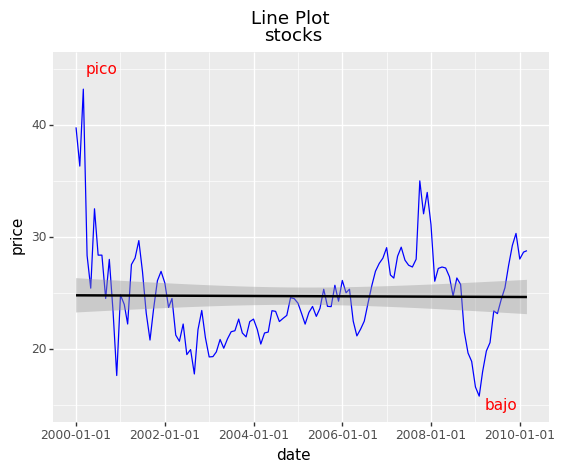

In [26]:
from plotnine.geoms import geom_smooth
# create new ggplot object
# aes (aesthetics)
line_plot = ggplot(data = stocks_MSFT, mapping = aes(x='date', y='price'))

# add layers
# draw() not needed
(line_plot + 
 plotnine.geom_line(color='blue') + 
 # labels
 plotnine.labs(title='Line Plot \nstocks') +
 plotnine.geom_smooth(method ='lm')+
 # add annotation to plot
 plotnine.annotate('text', x=pd.Timestamp('2000-08-01'), y=45, label='pico', color='red')+
 plotnine.annotate('text', x=pd.Timestamp('2009-08-01'), y=15, label='bajo', color='red')
 ).draw();

# Ploteamos todos los symbols

/usr/local/lib/python3.7/dist-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 3 rows containing missing values.
  warn(msg.format(n1-n2), PlotnineWarning)


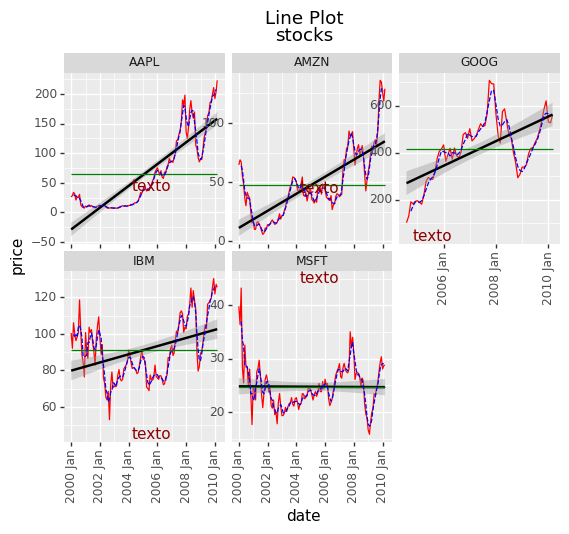

In [27]:
from plotnine.themes.elements import element_text
from plotnine.themes import theme
# create new ggplot object
# aes (aesthetics)
line_plot = ggplot(data=stocks, mapping=aes(x='date', y='price'))

# add layers
# draw() not needed
(line_plot + 
 plotnine.geom_line(color='red') + 
 plotnine.geom_smooth(method ='lm') + # tendencia
 plotnine.geom_line(aes(x='date',y='media'),color ='green') +  # media
 plotnine.geom_line(aes(x='date',y='MA_4'),color ='blue',linetype = "dashed") + # media movil
 plotnine.facet_wrap('symbol',scales='free') +    # independiza los plots , hace un plot por cada symbol
 #plotnine.geom_smooth(method = 'lm') +
 plotnine.theme(axis_text_x= element_text(angle=90)) +
 plotnine.scale_x_date(date_labels ='%Y %b',breaks ='2 years') +
 # labels
 
 plotnine.labs(title='Line Plot\nstocks') +

 # add annotation to plot
 plotnine.annotate('text', x=pd.Timestamp('2005-08-01'), y=45, label='texto', color='darkred')).draw();

# Plot con seaborn

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

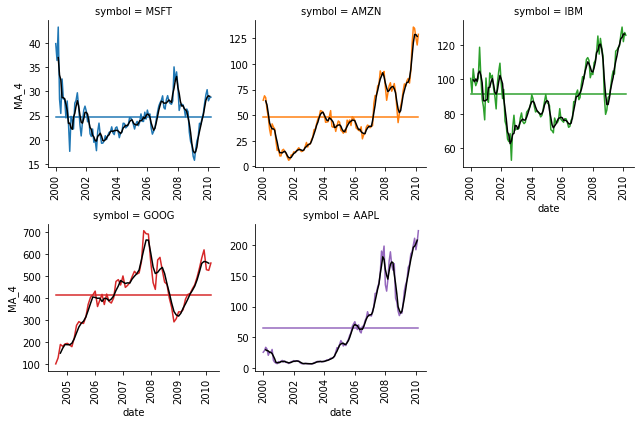

In [29]:
g = sns.FacetGrid(stocks, col="symbol"
                     ,col_wrap =3
                      ,sharey=False
                      ,sharex=False
                  ,hue = 'symbol' )
g.map(sns.lineplot, 'date', "price")   # original
g.map(sns.lineplot, "date", "media")    # media simple
g.map(sns.lineplot, "date", "MA_4",color ='k')  # MA (w = 4)

# esta parte hace la rotación por cada plot

for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()